In [117]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Вспомогательные функции
def count_percent(data, col, is_series=False):
    if is_series:
        filled = data.fillna('Unknown')
    else:
        if col is None:
            raise ValueError("Укажите имя столбца col для DataFrame.")
        filled = data[col].fillna('Unknown')
    counts = filled.value_counts()
    perc = (counts / counts.sum() * 100).round(1)
    return pd.DataFrame({'Количество': counts, 'Процент, %': perc})

In [119]:
# График count plot
def plot_count(data, column, title=None, hue=None, xlabel=None, ylabel='Количество', order=None, xlabelrotation=False, legend=False):
    if hue is None:
        hue = column
    if title is None:
        title = f'Распределение {column}'
    if xlabel is None:
        xlabel = column
    sns.countplot(x=column, data=data, order=order, hue=hue)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    if xlabelrotation:
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [120]:
# Построение графика для колонок с множественной классификацией.
def plot_top_n_from_list(data, column, title=None, top_n=30, xlabel='Количество', ylabel=None):
    list_col = data[column].dropna().str.split(', ')
    all_items = list_col.explode()
    counts = all_items.value_counts()
    
    top_items = counts[:top_n]
    
    sns.barplot(x=top_items.values, y=top_items.index)
    if title is None:
        title = f'Top-{top_n} {col}'
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel is None:
        ylabel = col
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [121]:
# Подсчет количества и процентного соотношения элементов в колонке с множественной классификацией.
def count_percent_multiclass(data, column, top_n=None):
    all_items = data[column].dropna().str.split(', ').explode()
    counts = all_items.value_counts()
    if top_n:
        counts = counts[:top_n]
    perc = (counts / counts.sum() * 100).round(1)
    return pd.DataFrame({'Количество': counts, 'Процент, %': perc})

# Разведочный анализ данных (EDA)
## Общая информация по данным

In [122]:
# Загрузка данных
data_train = pd.read_csv('../data/interactions_train.csv', sep=',')
data_items = pd.read_csv('../data/items.csv', sep=',')
data_users = pd.read_csv('../data/users.csv', sep=',')
data_test = pd.read_csv('../data/interactions_public_test.csv', sep=',')

In [123]:
# Объединение файлов
data = (
    data_train
    .merge(data_users, on='user_id', how='left')
    .merge(data_items, on='item_id', how='left')
)

In [124]:
data.head().T

,0,1,2,3,4
user_id,3,3,3,3,4
item_id,10139,7204,12928,3897,811
last_watch_dt,2021-04-25,2021-07-17,2021-08-17,2021-08-17,2021-06-12
total_dur,103.0,28.0,845.0,901.0,6191.0
watched_pct,2.0,1.0,15.0,15.0,100.0
age,age_35_44,age_35_44,age_35_44,age_35_44,NaN
income,income_20_40,income_20_40,income_20_40,income_20_40,NaN
sex,Ж,Ж,Ж,Ж,NaN
kids_flg,1.0,1.0,1.0,1.0,NaN
content_type,film,film,film,film,film


In [125]:
data.shape

(922967, 21)

Размерность около 923 тысяч строк, 21 признак.

In [126]:
# Вывод информации о типах признаков
data.dtypes

user_id            int64
item_id            int64
last_watch_dt     object
total_dur        float64
watched_pct      float64
age               object
income            object
sex               object
kids_flg         float64
content_type      object
title             object
title_orig        object
release_year     float64
genres            object
countries         object
for_kids         float64
age_rating       float64
studios           object
directors         object
actors            object
keywords          object
dtype: object

In [127]:
# Проверка на пустые значения
data.isnull().sum()

user_id               0
item_id               0
last_watch_dt         0
total_dur             1
watched_pct         185
age              178846
income           178537
sex              178941
kids_flg         168510
content_type          0
title                 0
title_orig        63785
release_year         66
genres                0
countries            39
for_kids         902894
age_rating            0
studios          915248
directors          8651
actors            27356
keywords          38082
dtype: int64

In [128]:
# Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

In [129]:
# Просмотр уникальных значений
data.nunique()

user_id          284999
item_id           11856
last_watch_dt       163
total_dur         60075
watched_pct         101
age                   6
income                6
sex                   2
kids_flg              2
content_type          2
title             11403
title_orig         8616
release_year        103
genres             2247
countries           631
for_kids              2
age_rating            6
studios              36
directors          6498
actors             9897
keywords          11408
dtype: int64

## 1. Признаки пользователей
- user_id - уникальный идентификатор пользователя
- age - возраст пользователя
- income - доход
- sex - пол
- kids_flg - флаг детского профиля

### Распределение пользователей по возрасту
**Цель:** Проанализировать распределение пользователей по возрасту, выявление преобладающих возрастных групп.

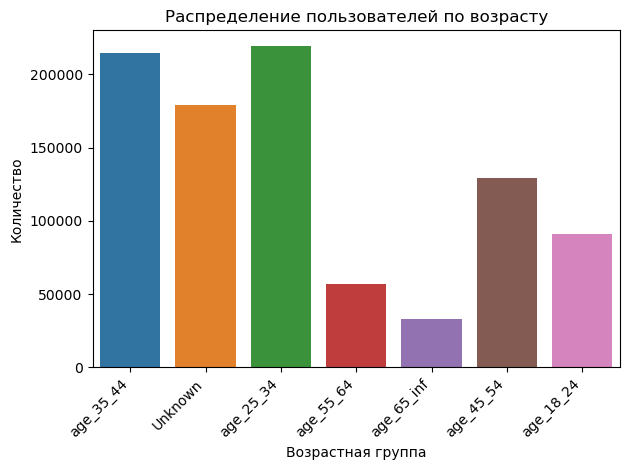

In [130]:
data['age'] = data['age'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'age', title='Распределение пользователей по возрасту', xlabel='Возрастная группа', xlabelrotation=True)

In [131]:
age_df = count_percent(data, 'age')
age_df

,Количество,"Процент, %"
age,,
age_25_34,219175,23.7
age_35_44,214491,23.2
Unknown,178846,19.4
age_45_54,129407,14.0
age_18_24,91102,9.9
age_55_64,56934,6.2
age_65_inf,33012,3.6


***Вывод:*** 
- Наибольшие группы пользователей от **25 до 34 - 29.5%** и от **35 до 44 - 28.8%**.
- Наименьшие группы от **55 до 64 лет - 7.7%** и **выше 65 лет - 4.4%**.
- Пропущено около **20%** возрастов пользователей.

### Распределение пользователей по полу
**Цель:** Проанализировать распределение пользователей по полу, выявление преобладающего по количеству пола.

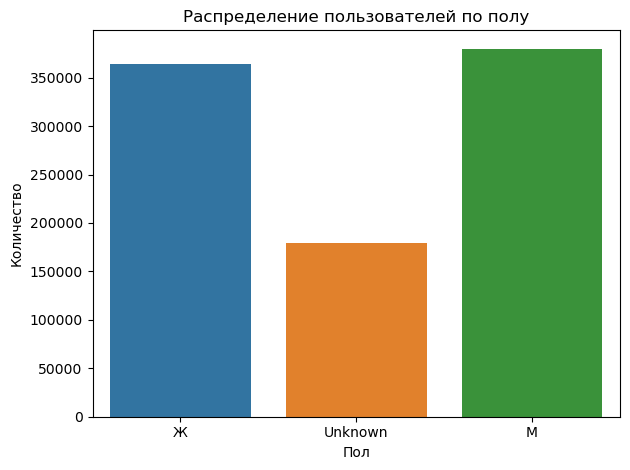

In [132]:
data['sex'] = data['sex'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'sex', title='Распределение пользователей по полу', xlabel='Пол')

In [133]:
# Подсчет процентного соотношения пользователей в зависимости от пола.
sex_df = count_percent(data, 'sex')
sex_df

,Количество,"Процент, %"
sex,,
М,379890,41.2
Ж,364136,39.5
Unknown,178941,19.4


***Вывод:*** 
- В целом пользователи распределены по ровну по полу, **41.2% мужчины** и **39.5% женщины** соответственно.
- Около **19.4%** данных о поле пользователей неизвестно.

### Соотношение детей.
**Цель:** Выяснить процентное соотношение пользователей с детским профилем к общему числу пользователей.

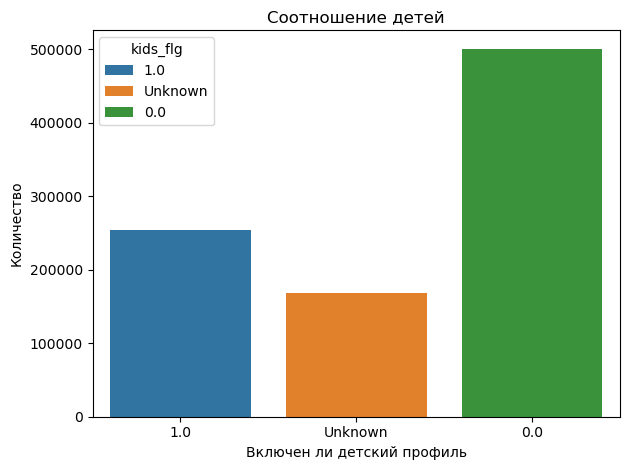

In [134]:
data['kids_flg'] = data['kids_flg'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'kids_flg', title='Соотношение детей', xlabel='Включен ли детский профиль', xlabelrotation=False)

In [135]:
# Подсчет процентного соотношения пользователей с детским профилем к общему числу пользователей.
kids_df = count_percent(data, 'kids_flg')
kids_df

,Количество,"Процент, %"
kids_flg,,
0.0,500469,54.2
1.0,253988,27.5
Unknown,168510,18.3


***Вывод:*** 
- У **27.5%** пользователей включен детский профиль.
- Для **18.3%** данные неизвестны.

### Распределение пользователей в зависимости от дохода.
**Цель:** Выяснить соотношение пользователей с различным уровнем дохода.

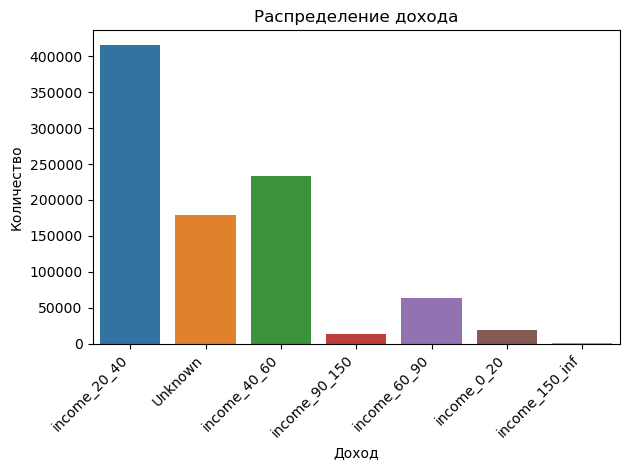

In [136]:
data['income'] = data['income'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'income', title='Распределение дохода', xlabel='Доход', xlabelrotation=True)

In [137]:
# Подсчет процентного соотношения пользователей с различным уровнем дохода.
income_df = count_percent(data, 'income')
income_df

,Количество,"Процент, %"
income,,
income_20_40,415339,45.0
income_40_60,232944,25.2
Unknown,178537,19.3
income_60_90,62827,6.8
income_0_20,19529,2.1
income_90_150,12842,1.4
income_150_inf,949,0.1


***Вывод:*** 
- Наибольшее кол-во пользователей имеют доход **от 20 до 40** тысяч в месяц, что равняется **45%**.
- Минимальное кол-во пользователей обладают доходом от **90 до 150 (1.4%)** и выше **150 (0.1%)** тысяч соответственно.
- Для **19.3%** данные неизвестны.

## 2. Признаки видеоконтента
- item_id - уникальный идентификатор видео
- content_type - тип контента
- title - название видео
- title_orig - ссылка на оригинальное видео
- release_year - год создания видео
- genres - жанры
- countries - страна(ы), где создали видео
- for_kids - детский контент
- age_rating - возрастной рейтинг
- studios - студия, где снималось видео
- directors - режиссер видео
- actors - актеры
- keywords - ключевые слова

### Распределение видео в зависимости от типа контента.
**Цель:** Выяснить распределение видео по типу.

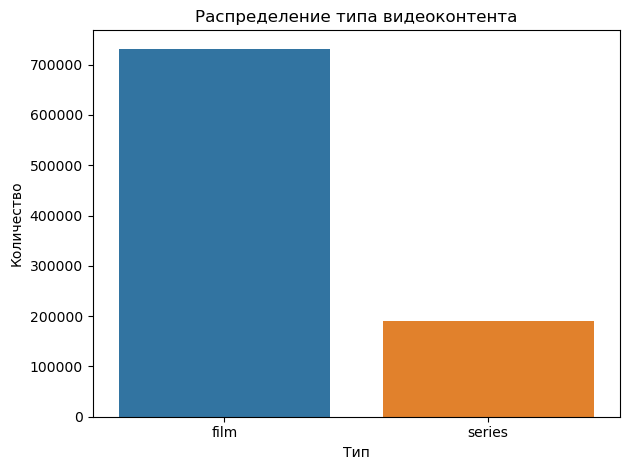

In [138]:
plot_count(data, 'content_type', title='Распределение типа видеоконтента', xlabel='Тип')

In [139]:
# Подсчет процентного соотношения типов контента.
income_df = count_percent(data, 'content_type')
income_df

,Количество,"Процент, %"
content_type,,
film,731723,79.3
series,191244,20.7


***Вывод:*** 
- **79.3%** контента это фильм.
- **20.7%** контента сериал.

### Количество видео по годам выпуска (последние 30 лет)
**Цель:** Выяснить распределение видеоконтента за последние 30 лет.

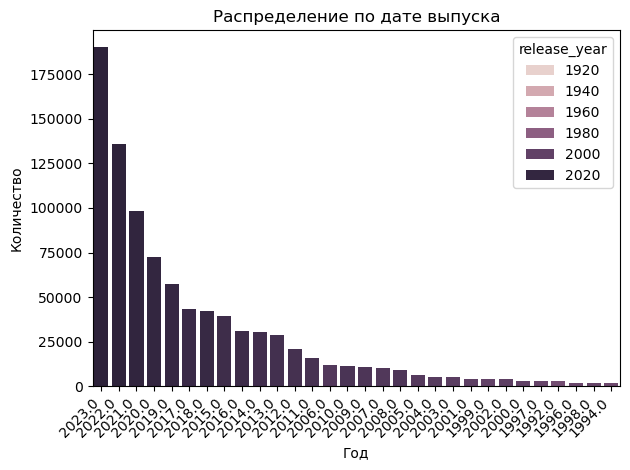

In [140]:
plot_count(data, 'release_year', title='Распределение по дате выпуска', xlabel='Год', xlabelrotation=True, order=data['release_year'].value_counts().index[:30])

In [141]:
# Подсчет процентного соотношения типов контента.
release_df = count_percent(data, 'release_year')
release_df.head(30)

,Количество,"Процент, %"
release_year,,
2023.0,190074,20.6
2022.0,135706,14.7
2021.0,98511,10.7
2020.0,72400,7.8
2019.0,57234,6.2
2017.0,43188,4.7
2018.0,42056,4.6
2015.0,39166,4.2
2016.0,30827,3.3


***Вывод:***
- Наибольшее количество контента приходится на **2023 год (20.6%)**, далее идут **2022 (14.7%)** и **2021 (10.7%)**.
- Наблюдается явная тенденция к уменьшению числа релизов с уходом в прошлое, что отражает рост активности последних лет и сокращение числа старого контента в базе.

### Кол-во контента по жанрам.
**Цель:** Выяснить преобладающие жанры контента на сервисе.

In [142]:
# Кол-во уникальных жанров
data.genres.nunique()

2247

Имея ввиду что кол-во жанров велико - **2247**, принято решение рассмотреть **топ 30 самых популярных жанров**.

Перед этим необходимо разделить жанры.

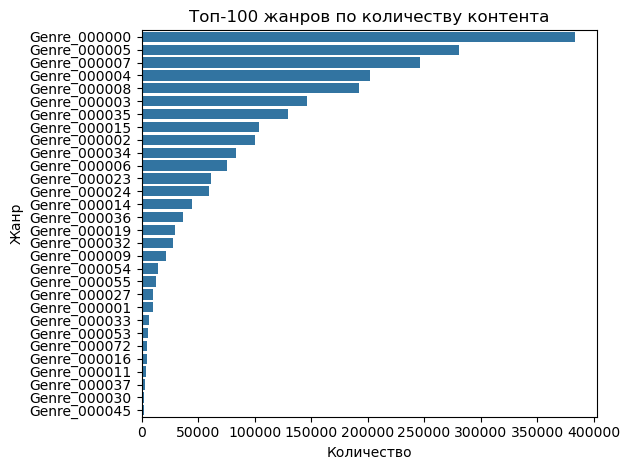

In [143]:
plot_top_n_from_list(data, 'genres', title='Топ-100 жанров по количеству контента', top_n=30, ylabel='Жанр')

In [144]:
genres_df = count_percent_multiclass(data, 'genres')
top_30 = genres_df.head(30)
top30_total_perc = top_30['Процент, %'].sum()
f'Топ-30 жанров покрывают {top30_total_perc:.1f}% всего контента'

'Топ-30 жанров покрывают 99.3% всего контента'

**Вывод:** Топ‑30 жанров охватывают **99.3%** всего контента сервиса. 
Это оправдывает сокращение исходного множества жанров до 30 для дальнейшего анализа и визуализации.

### Распределение контента по странам.
**Цель:** Выяснить преобладающие страны авторы контента на сервисе.

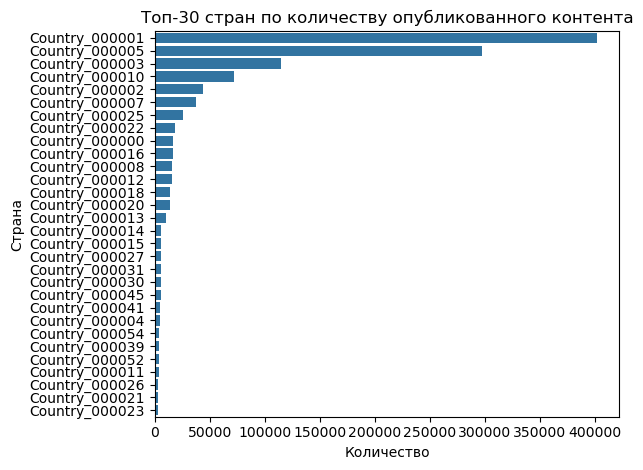

In [145]:
plot_top_n_from_list(data, 'countries', title='Топ-30 стран по количеству опубликованного контента', top_n=30, ylabel='Страна')

In [146]:
countries_df = count_percent_multiclass(data, 'genres')
top_30_countries = countries_df.head(30)
top_30_countries_total_perc = top_30_countries['Процент, %'].sum()
f'Топ-30 стран публикуют {top_30_countries_total_perc:.1f}% от всего контента'

'Топ-30 стран публикуют 99.3% от всего контента'

**Вывод:** Топ‑30 стран охватывают **99.3%** всего контента сервиса. Мы можем рассматривать их как основные страны для дальнейшего анализа и обучения моделей.

### Распределение ключевых слов по контенту.
**Цель:** Выяснить самые частовстречающиеся ключевые слова под контентом.

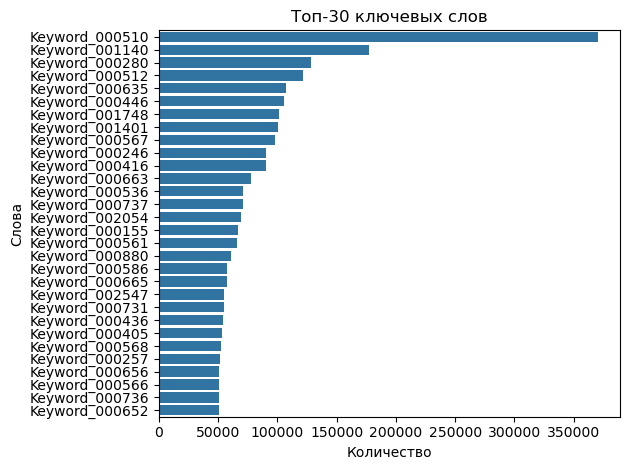

In [147]:
plot_top_n_from_list(data, 'keywords', title='Топ-30 ключевых слов', top_n=30, ylabel='Слова')

In [148]:
keywords_df = count_percent_multiclass(data, 'keywords')
n = 300
top_n_keywords = keywords_df.head(n)
top_n_keywords_total_perc = top_n_keywords['Процент, %'].sum()
f'Топ-{n} ключевых слов которые встречаются в {top_n_keywords_total_perc}% всего контента'

'Топ-300 ключевых слов которые встречаются в 32.099999999999994% всего контента'

In [149]:
# Кол-во уникальных слов
f"Количество уникальных ключевых слов: {data.keywords.nunique()}"

'Количество уникальных ключевых слов: 11408'

In [150]:
# Количество пустых значений
f"Количество пустых ключевых слов: {int(data.keywords.isnull().sum())}"

'Количество пустых ключевых слов: 38082'

**Вывод:** Ключевые слова характеристика, которая обладает большим количество пропусков - **68%**. Оставшиеся **32%** охватывает 300 ключевых слов, ввиду этого можно исключить этот признак из анализ и заменить его числовым признаком: **кол-во ключевых слов на контенте**.

### Количество детского контента.
**Цель:** Выяснить соотношение обычного и детского контента.

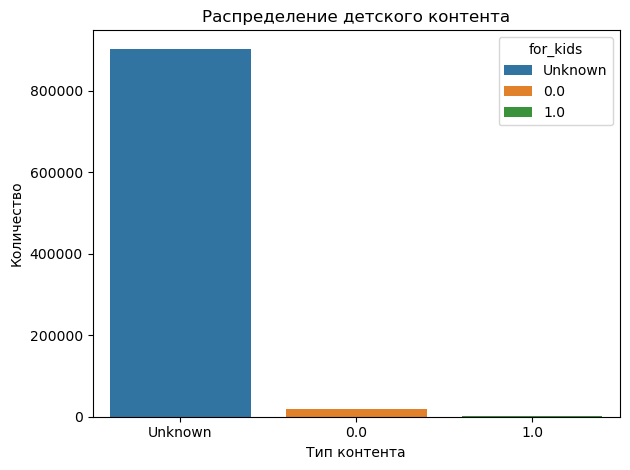

In [151]:
data['for_kids'] = data['for_kids'].fillna('Unknown')  # Заполнение пропусков третьей группой.
plot_count(data, 'for_kids', title='Распределение детского контента', xlabel='Тип контента')

In [152]:
# Подсчет процентного соотношения типов контента.
for_kids_df = count_percent(data, 'for_kids')
for_kids_df

,Количество,"Процент, %"
for_kids,,
Unknown,902894,97.8
0.0,18981,2.1
1.0,1092,0.1


**Вывод:**
- Большинство записей (**97.8%**) имеют пропуски.
- Реальные отметки почти отстутствуют, всего **2.2%**.
- Признак неинформативен, его следует исключить, либо использовать как бинарный (**0 - не детский, 1 - детский**), либо заполнить исходя из признака **age_rating**

### Количество контента по возрастным категориям.
**Цель:** Выяснить какая возрастная категория преобладает.

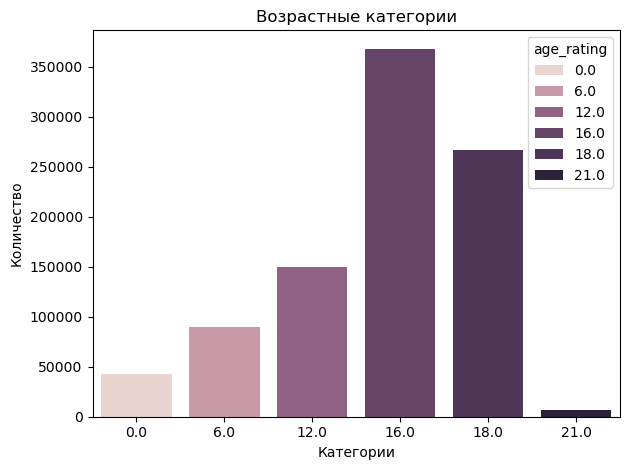

In [153]:
plot_count(data, 'age_rating', title='Возрастные категории', xlabel='Категории')

In [154]:
# Подсчет процентного соотношения возрастных категорий.
age_rating_df = count_percent(data, 'age_rating')
age_rating_df

,Количество,"Процент, %"
age_rating,,
16.0,367848,39.9
18.0,266340,28.9
12.0,149782,16.2
6.0,89813,9.7
0.0,42346,4.6
21.0,6838,0.7


**Вывод:**
- Преобладающая возрастная категория - 16 лет (**39.9%**).
- Вторая и третья категории - это 18 лет (**28.9%**) и 12 лет (**16.2%**)
- На эти три категории приходится **85%** всего контента.
- Контент $\leq 12$ лет можно считать детским, на него приходится **21%** всего контента.

## 3. Взаимодействие пользователей с контентом
- user_id - уникальный идентификатор пользователя;
- item_id - уникальный идентификатор видео;
- last_watch_dt - последнее время просмотра видео;
- total_dur - общая продолжительность видео;
- watched_pct - процент просмотра видео пользователем.